In [41]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from data_loader import DataLoader
from data_analysis import report_on_dataset
from eda import perform_eda
from preprocessing import encode_categorical_features, scale_numeric_features
from feature_engineering import feature_engineering
from feature_selection import select_features
from modeling import train_and_evaluate_models
from anomaly_detection import detect_anomalies
from visualization import plot_real_vs_pred, plot_prediction_errors, plot_metrics, plot_feature_importance, plot_anomalies

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Шаг 2: Загрузка данных

In [42]:

data_loader = DataLoader('most_used_beauty_cosmetics_products_extended.csv')
df = data_loader.load_data()
print(df.head)

<bound method NDFrame.head of            Product_Name              Brand        Category Usage_Frequency  \
0       Ultra Face Mask     Drunk Elephant           Blush          Weekly   
1        Ultra Lipstick      Laura Mercier  Makeup Remover      Occasional   
2           Ultra Serum     Natasha Denona     Highlighter           Daily   
3          Divine Serum        Ilia Beauty       Face Mask      Occasional   
4      Super Foundation  Charlotte Tilbury     Highlighter      Occasional   
...                 ...                ...             ...             ...   
14995    Magic Eyeliner         Patrick Ta       Face Mask           Daily   
14996    Perfect Powder            Farsali           Serum          Weekly   
14997       Magic Serum            Kiehl’s     Highlighter      Occasional   
14998     Magic Mascara       Perricone MD          Powder          Weekly   
14999  Divine Lip Liner             Tatcha           Blush           Daily   

       Price_USD  Rating  Number_

# Шаг 3: Отчет о датасете

In [43]:
report_on_dataset(df)

Количество строк и столбцов:
15000 строк, 14 столбцов

Пропущенные значения:
Пропущенные значения отсутствуют.

Типы данных в столбцах:
Product_Name: object
Brand: object
Category: object
Usage_Frequency: object
Price_USD: float64
Rating: float64
Number_of_Reviews: int64
Product_Size: object
Skin_Type: object
Gender_Target: object
Packaging_Type: object
Main_Ingredient: object
Cruelty_Free: bool
Country_of_Origin: object

Основная статистика для числовых столбцов:
          Price_USD        Rating  Number_of_Reviews
count  15000.000000  15000.000000       15000.000000
mean      80.134108      3.002327        5014.231333
std       40.402983      1.168029        2855.665464
min       10.000000      1.000000          52.000000
25%       45.480000      2.000000        2562.000000
50%       80.040000      3.000000        5002.000000
75%      114.760000      4.000000        7497.000000
max      149.990000      5.000000       10000.000000

Основная статистика для категориальных столбцов:
    

# Шаг 4: Разведочный анализ данных (EDA)

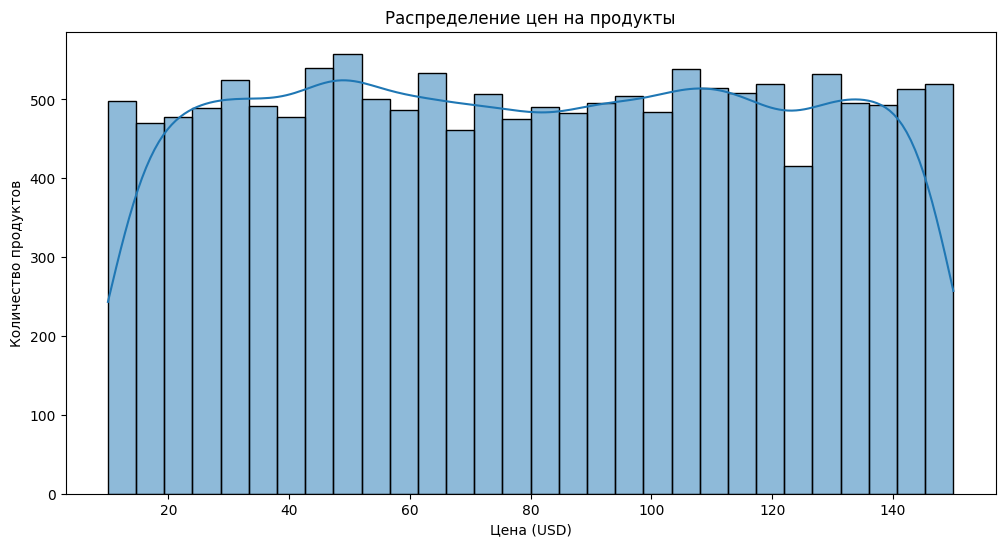

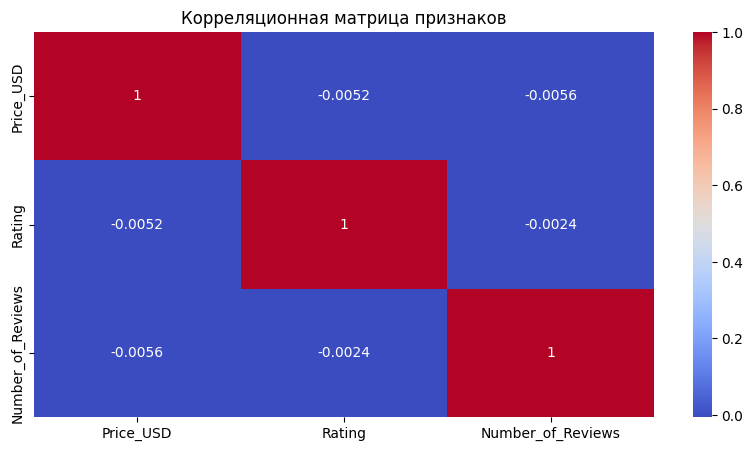

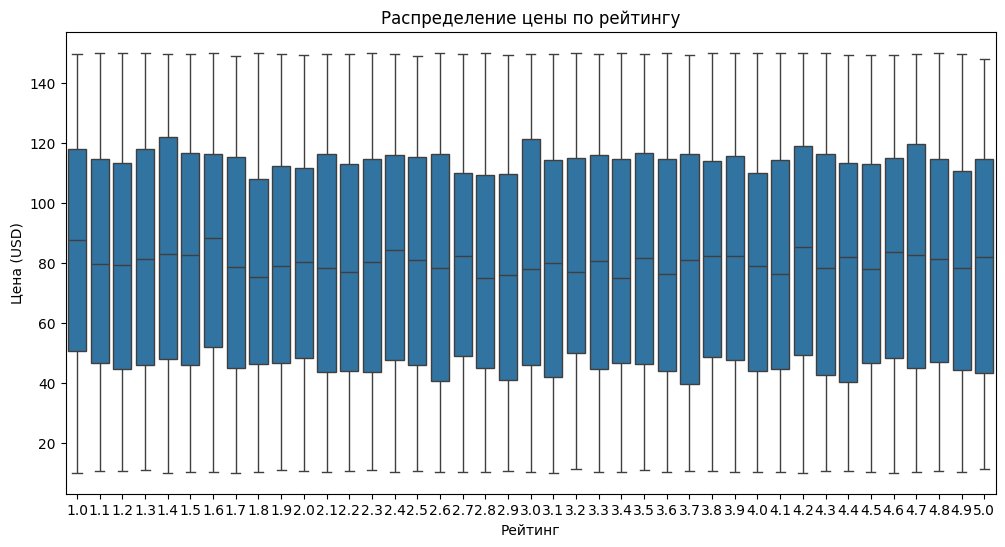

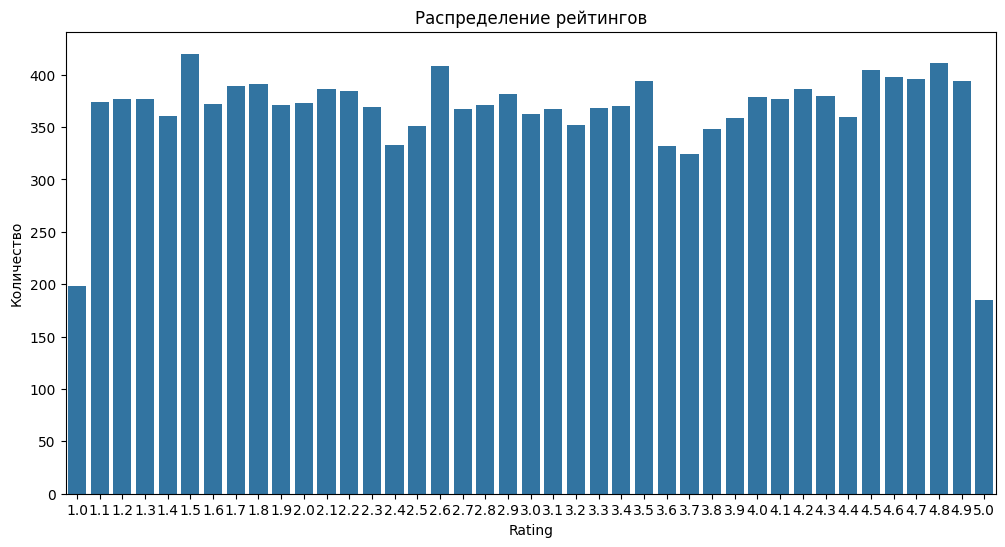

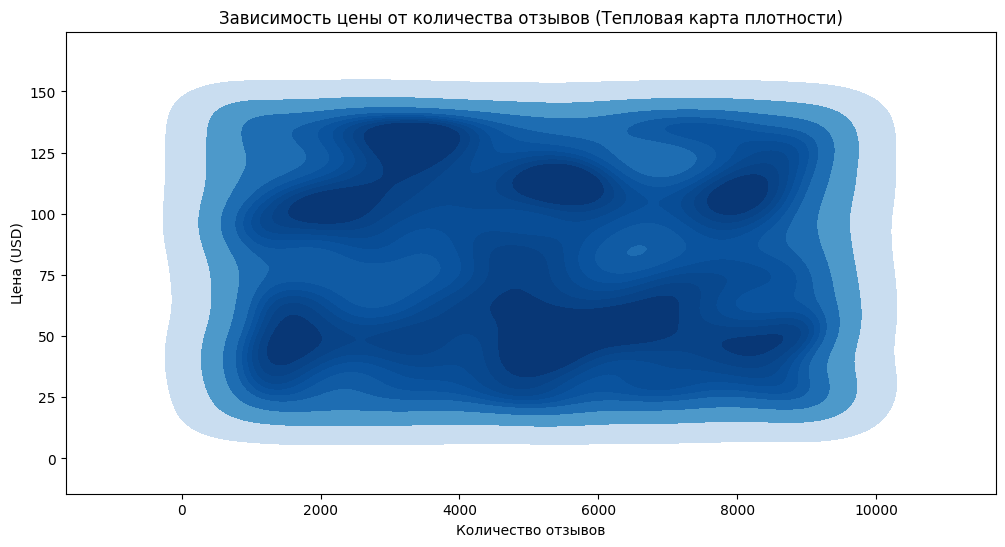

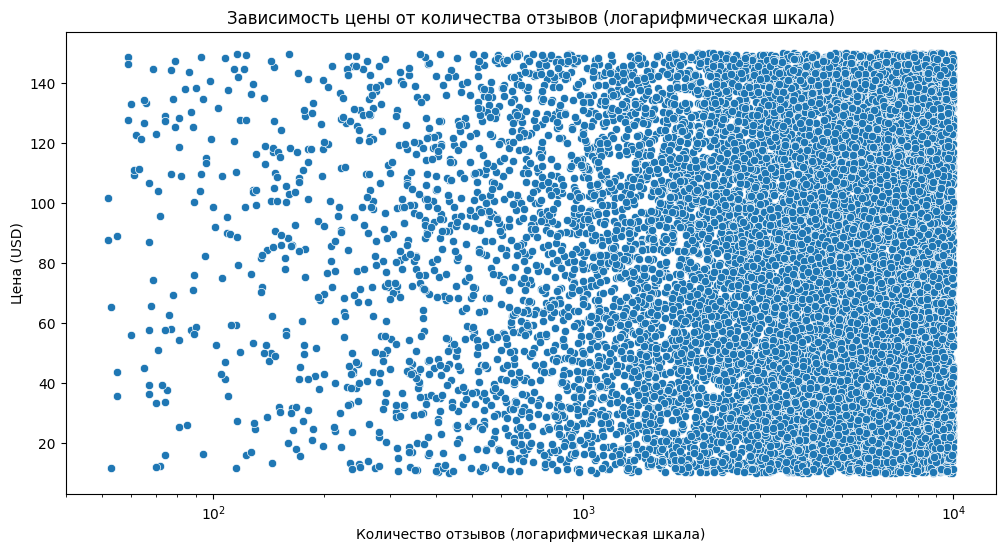

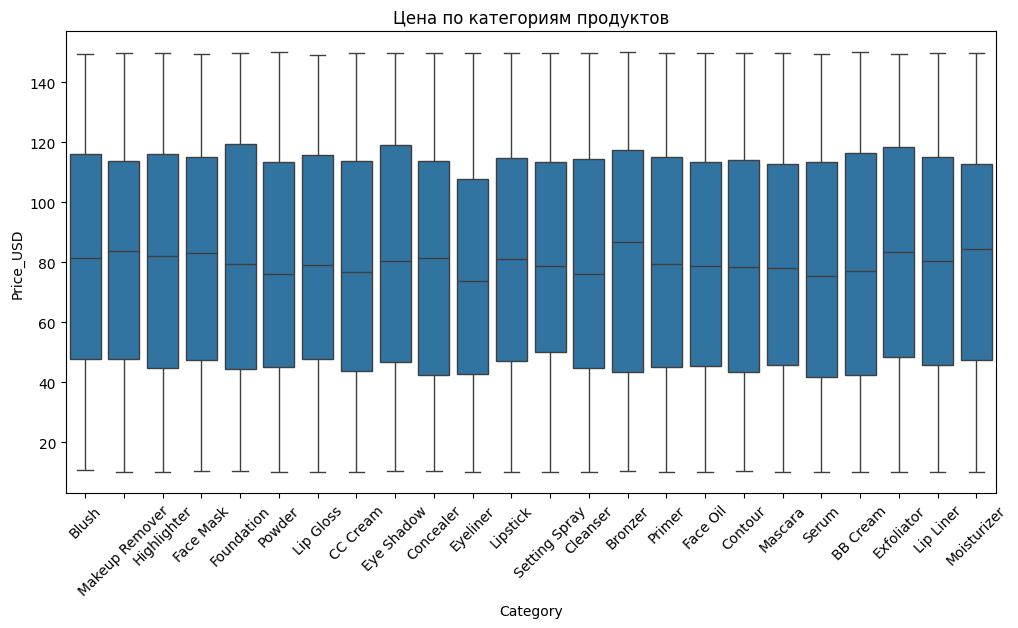

In [44]:
perform_eda(df)

### Интерпретация графиков

### Распределение цен на продукты

Распределение цен на продукты относительно равномерное, с небольшими колебаниями. Пик плотности наблюдается в средней части диапазона цен, что указывает на более частое появление средних цен.

### Корреляционная матрица признаков

Отрицательные корреляции между признаками указывают на то, что по мере увеличения одного признака другой признак имеет тенденцию уменьшаться.

### Возможные причины

- **Ожидания потребителей:** Более высокие цены могут устанавливать более высокие ожидания, и, если они не оправдываются, это влияет на рейтинг.
- **Поведение покупателей:** Покупатели дорогих товаров могут быть менее активными в оставлении отзывов или сама группа покупателей может быть меньше.
- **Склонность к отзывам:** Недовольные клиенты более склонны оставлять отзывы, что влияет на количество отзывов и средний рейтинг.

### Распределение цены по рейтингу

Средние цены продуктов остаются относительно стабильными независимо от рейтинга. Диапазоны цен внутри каждого рейтинга также схожи. Это указывает на то, что стоимость продукта не является определяющим фактором его рейтинга, и потребители оценивают продукты на основе других характеристик, таких как качество, эффективность или бренд.

### Распределение рейтингов

Наблюдаемое распределение рейтингов с понижением количества крайних оценок является важным сигналом о поведении пользователей и особенностях системы оценивания.

### Зависимость цены от количества отзывов (Тепловая карта плотности)

Визуально отсутствует явная зависимость между ценой и количеством отзывов. Основные скопления данных сосредоточены в областях средних цен и среднего количества отзывов. Это может указывать на то, что продукты средней стоимости получают среднее количество отзывов, но общее количество отзывов не зависит напрямую от цены продукта.

### Зависимость цены от количества отзывов (логарифмическая шкала)

Использование логарифмической шкалы позволяет лучше визуализировать данные с большим разбросом в количестве отзывов. Однако даже при логарифмической трансформации нет явной зависимости между ценой и количеством отзывов. Это подтверждает вывод о том, что цена продукта не существенно влияет на количество полученных отзывов.

### Цена по категориям продуктов

Большинство категорий имеют схожие медианные цены, что говорит об относительно однородной ценовой политике среди категорий. В некоторых категориях наблюдается больший разброс цен, что может указывать на наличие как бюджетных, так и премиальных продуктов. Отсутствие значительных различий в ценах между категориями может свидетельствовать о конкурентном рынке, где цена не сильно варьируется в зависимости от категории продукта.

### Общие выводы

- **Отсутствие сильных линейных зависимостей:** Между ключевыми показателями (ценой, рейтингом, количеством отзывов) нет явных линейных связей, но отрицательные корреляции указывают на сложные взаимосвязи.
- **Влияние потребительского поведения:**
  - Пользователи могут быть более критичными к дорогим продуктам, ожидая от них высокого качества.
  - Склонность оставлять отзывы чаще проявляется при негативном опыте.
- **Склонность к умеренным оценкам:** Низкое количество крайних оценок указывает на то, что пользователи предпочитают выставлять средние оценки, что может быть связано с эффектом центральной тенденции или нежеланием выражать крайние мнения.



# Шаг 5: Предобработка

In [45]:
data_preprocessed = df.copy()
data_preprocessed = feature_engineering(data_preprocessed)  
data_preprocessed = encode_categorical_features(data_preprocessed) 

numerical_features = data_preprocessed.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('Price_USD')

data_preprocessed = scale_numeric_features(data_preprocessed, numerical_features)

print("Столбцы после предобработки:", data_preprocessed.columns.tolist())


Столбцы после предобработки: ['Product_Name', 'Brand', 'Category', 'Price_USD', 'Rating', 'Number_of_Reviews', 'Gender_Target', 'Cruelty_Free', 'Product_Size_ml', 'Price_per_ml', 'High_Rating', 'Usage_Frequency_Monthly', 'Usage_Frequency_Occasional', 'Usage_Frequency_Weekly', 'Product_Size_150ml', 'Product_Size_200ml', 'Product_Size_250ml', 'Product_Size_30ml', 'Product_Size_50ml', 'Skin_Type_Dry', 'Skin_Type_Normal', 'Skin_Type_Oily', 'Skin_Type_Sensitive', 'Packaging_Type_Compact', 'Packaging_Type_Jar', 'Packaging_Type_Spray', 'Packaging_Type_Stick', 'Packaging_Type_Tube', 'Main_Ingredient_Glycerin', 'Main_Ingredient_Hyaluronic Acid', 'Main_Ingredient_Retinol', 'Main_Ingredient_Salicylic Acid', 'Main_Ingredient_Shea Butter', 'Main_Ingredient_Vitamin C', 'Country_of_Origin_France', 'Country_of_Origin_Germany', 'Country_of_Origin_Italy', 'Country_of_Origin_Japan', 'Country_of_Origin_South Korea', 'Country_of_Origin_UK', 'Country_of_Origin_USA']


# Шаг 6: Подготовка данных для моделирования

In [46]:
X = data_preprocessed.drop(['Price_USD'], axis=1)
y = data_preprocessed['Price_USD']

# Шаг 7: Отбор признаков

In [47]:
X_selected, selected_features = select_features(X, y, k=10)
print("Отобранные признаки:")
print(selected_features)

Отобранные признаки:
Index(['Product_Name', 'Price_per_ml', 'Usage_Frequency_Monthly',
       'Usage_Frequency_Occasional', 'Product_Size_200ml', 'Skin_Type_Dry',
       'Main_Ingredient_Retinol', 'Main_Ingredient_Salicylic Acid',
       'Country_of_Origin_Japan', 'Country_of_Origin_South Korea'],
      dtype='object')


# Шаг 8: Разделение данных на обучающую и тестовую выборки

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Шаг 9: Обучение и оценка моделей

In [49]:
results = train_and_evaluate_models(X_train, y_train, X_test, y_test)


Обучение модели: DummyRegressor
Лучшие параметры: {'quantile': 0.01, 'strategy': 'mean'}
MAE: 34.9976
MSE: 1641.4295
RMSE: 40.5146
R2 Score: -0.0000

Обучение модели: AdaBoostRegressor
Лучшие параметры: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}
MAE: 22.5731
MSE: 819.0977
RMSE: 28.6199
R2 Score: 0.5010

Обучение модели: HuberRegressor
Лучшие параметры: {'alpha': 0.01, 'epsilon': 1.75, 'fit_intercept': True, 'max_iter': 100, 'tol': 1e-05, 'warm_start': False}
MAE: 29.8589
MSE: 1232.6241
RMSE: 35.1087
R2 Score: 0.2490

Обучение модели: Lasso
Лучшие параметры: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'selection': 'random', 'tol': 0.01, 'warm_start': True}
MAE: 29.8859
MSE: 1231.3649
RMSE: 35.0908
R2 Score: 0.2498

Обучение модели: LassoLars
Лучшие параметры: {'alpha': 0.01, 'eps': 1e-16, 'fit_intercept': True, 'max_iter': 500, 'positive': False, 'verbose': True}
MAE: 29.8860
MSE: 1231.3628
RMSE: 35.0908
R2 Score: 

# Шаг 10: Анализ результатов моделей

In [50]:
metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[name]['mae'] for name in results],
    'MSE': [results[name]['mse'] for name in results],
    'RMSE': [results[name]['rmse'] for name in results],
    'R2 Score': [results[name]['r2'] for name in results]
})

# Шаг 11: Выбор лучшей модели

In [51]:
best_model_name = metrics_df.sort_values(by='R2 Score', ascending=False).iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\nЛучшая модель: {best_model_name} с R2 Score: {results[best_model_name]['r2']:.4f}")


Лучшая модель: AdaBoostRegressor с R2 Score: 0.5010


# Шаг 12: Обнаружение аномалий

In [52]:
residuals = (y_test - results[best_model_name]['y_pred']).values
anomaly_indices = detect_anomalies(residuals)
print(f"Количество обнаруженных аномалий: {len(anomaly_indices)}")

Количество обнаруженных аномалий: 30


# Шаг 13: Визуализация результатов

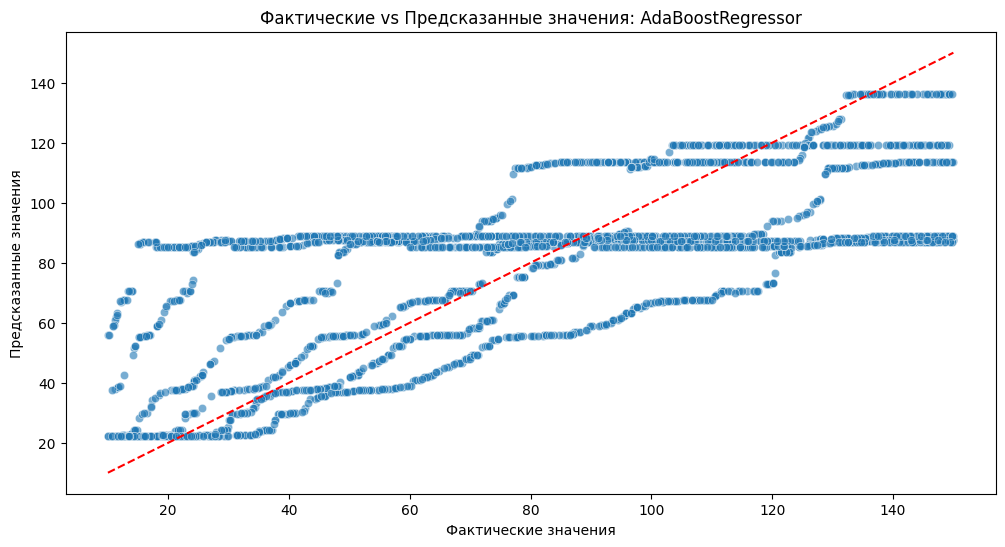

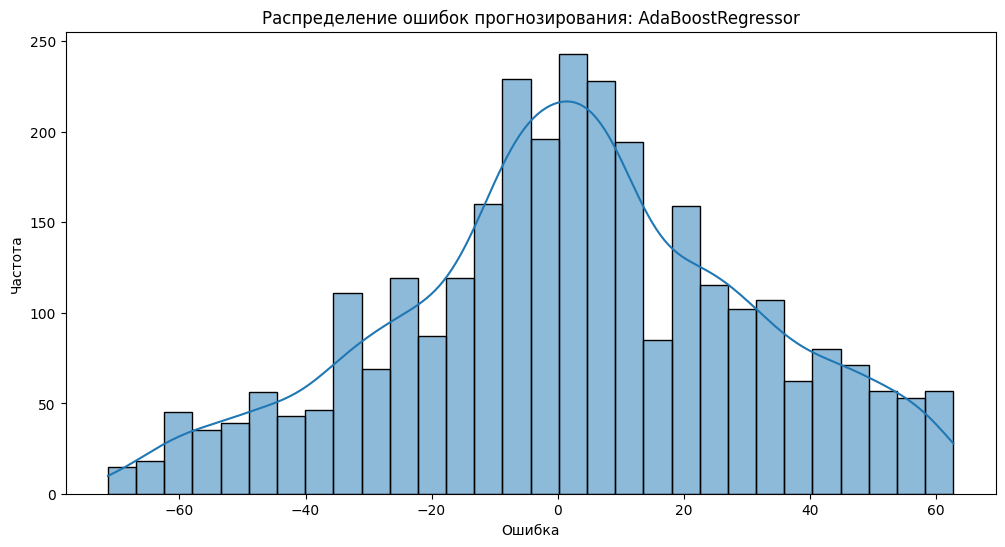

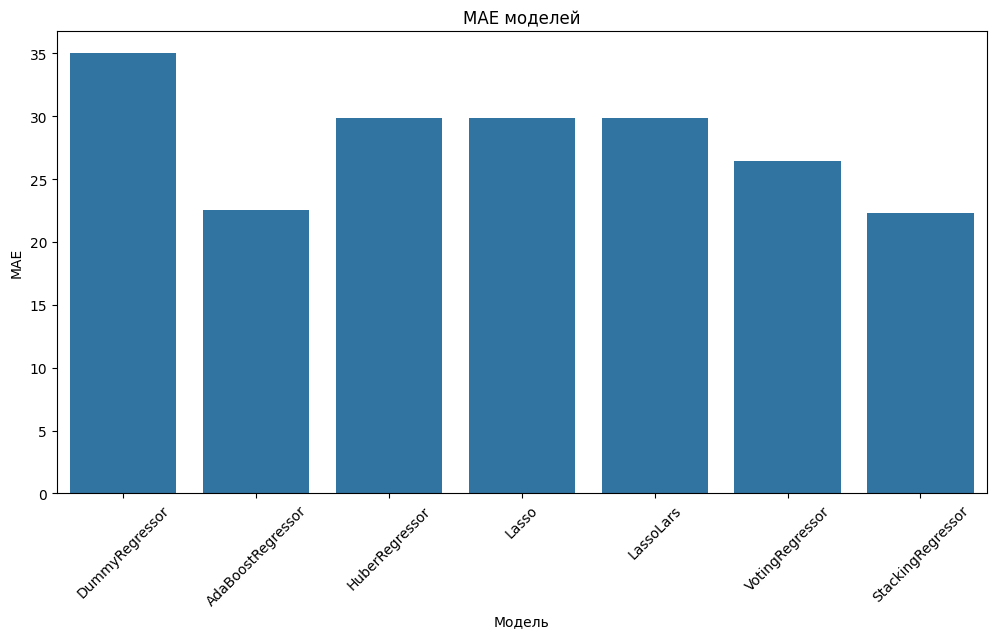

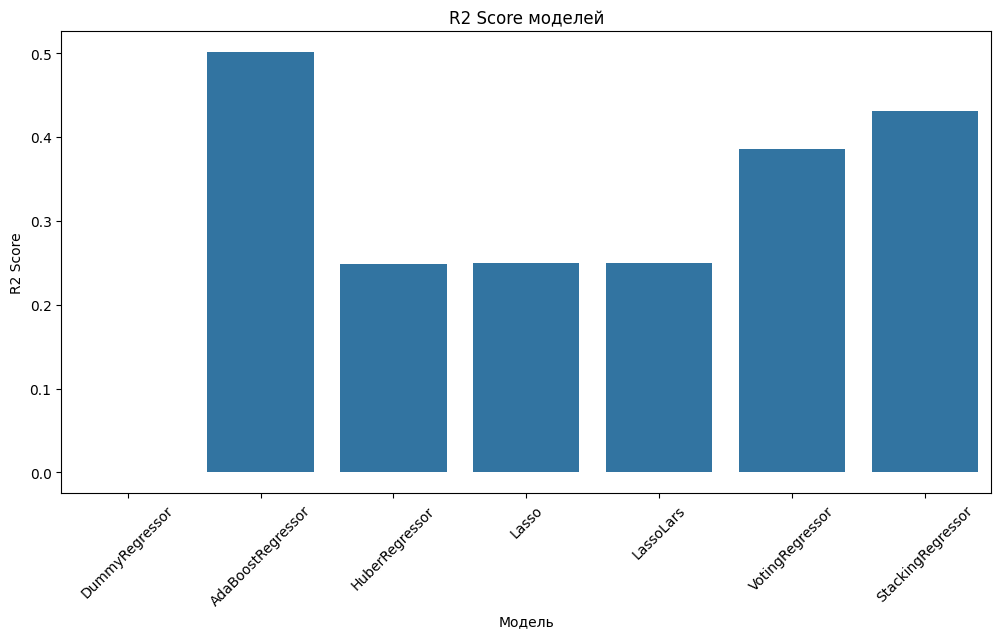

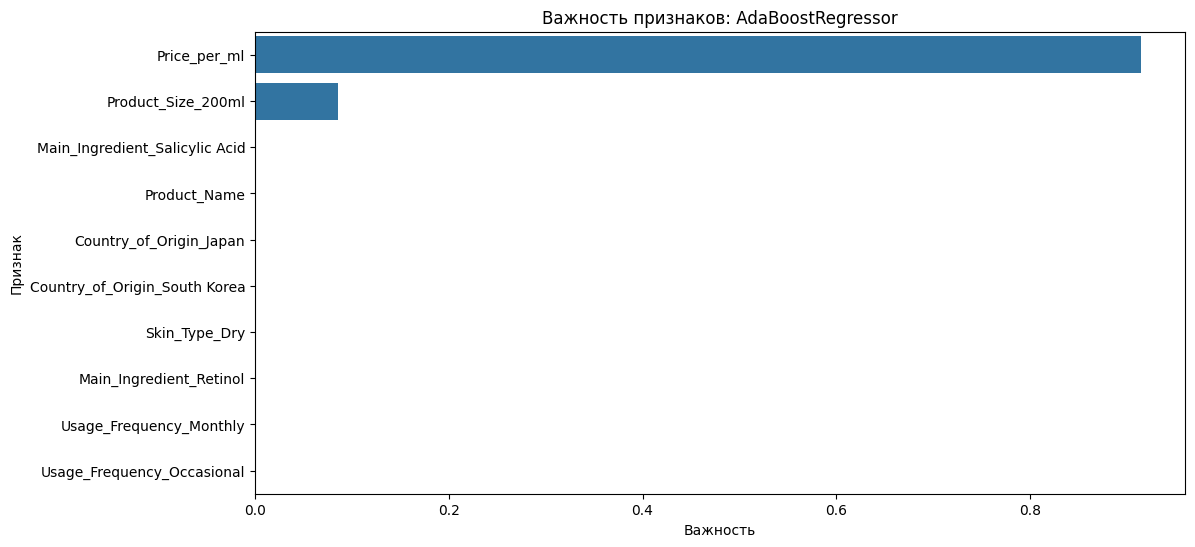

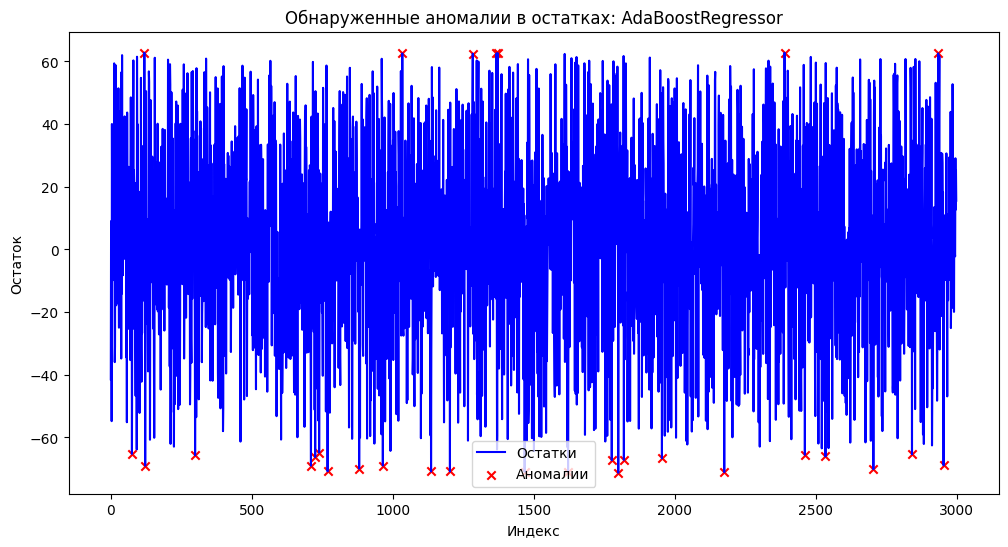

In [53]:
plot_real_vs_pred(y_test.values, results[best_model_name]['y_pred'], best_model_name)
plot_prediction_errors(y_test.values, results[best_model_name]['y_pred'], best_model_name)
plot_metrics(metrics_df)
plot_feature_importance(best_model, selected_features, best_model_name)
plot_anomalies(residuals, anomaly_indices, best_model_name)